### This Notebook shows how to use the Camera_Calibration_API to calibrate the camera using symmetrical circular grid pattern

In [1]:
import sys
sys.path.append("../../")
from camera_calibration import Camera_Calibration_API
import glob
import matplotlib.pyplot as plt
%matplotlib widget
import os
import cv2

(2048, 2560)


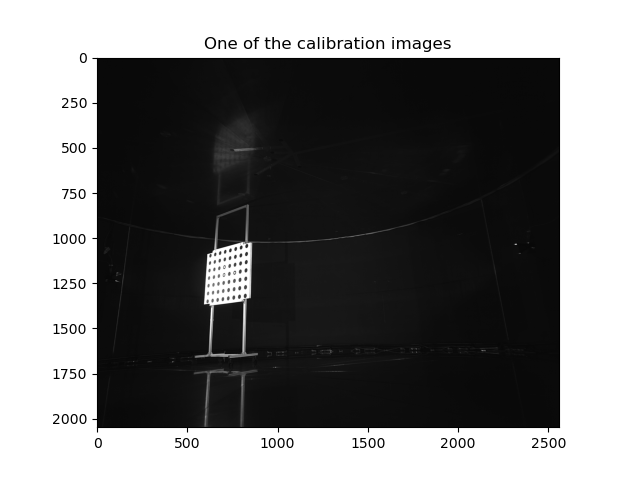

In [2]:
test_img = cv2.imread("/home/user/Downloads/2021_03_31_Data_set/Calibration/B00009_a.tiff",0)
print(test_img.shape)
plt.imshow(test_img,cmap="gray")
plt.title("One of the calibration images")
plt.show()

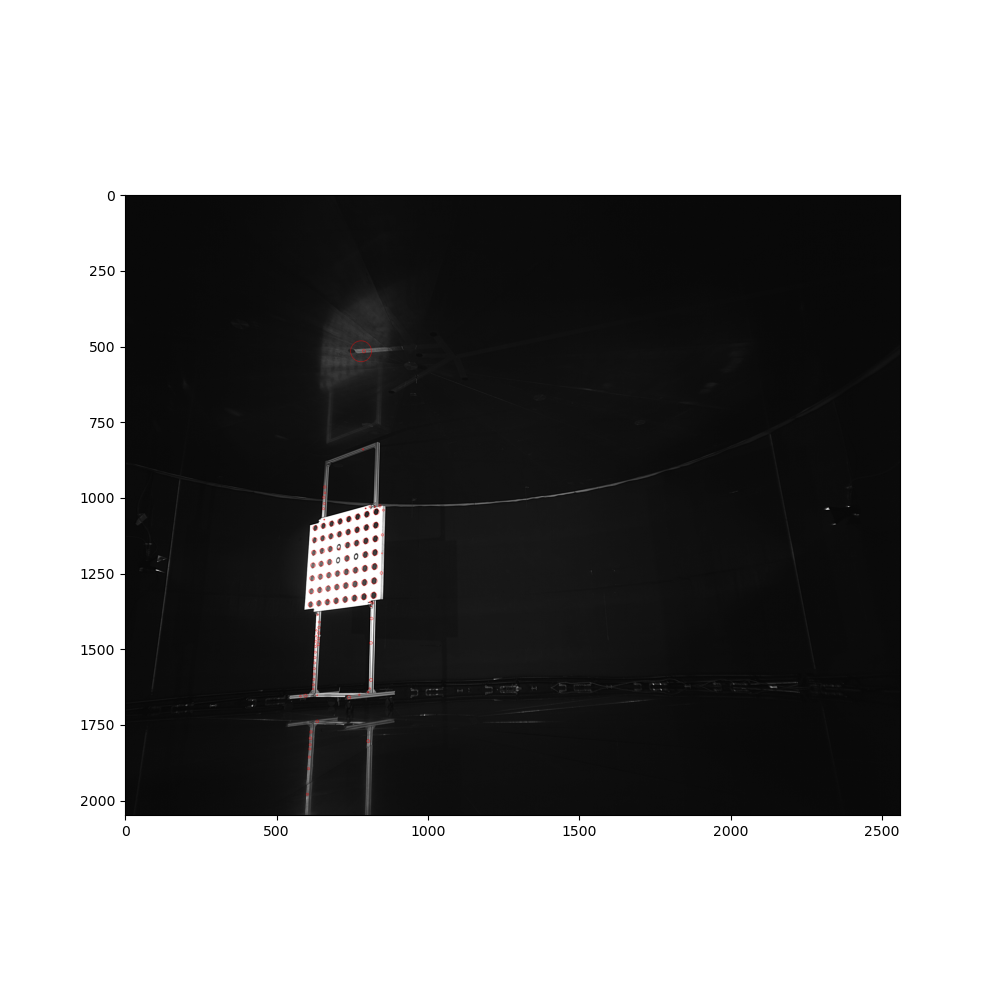

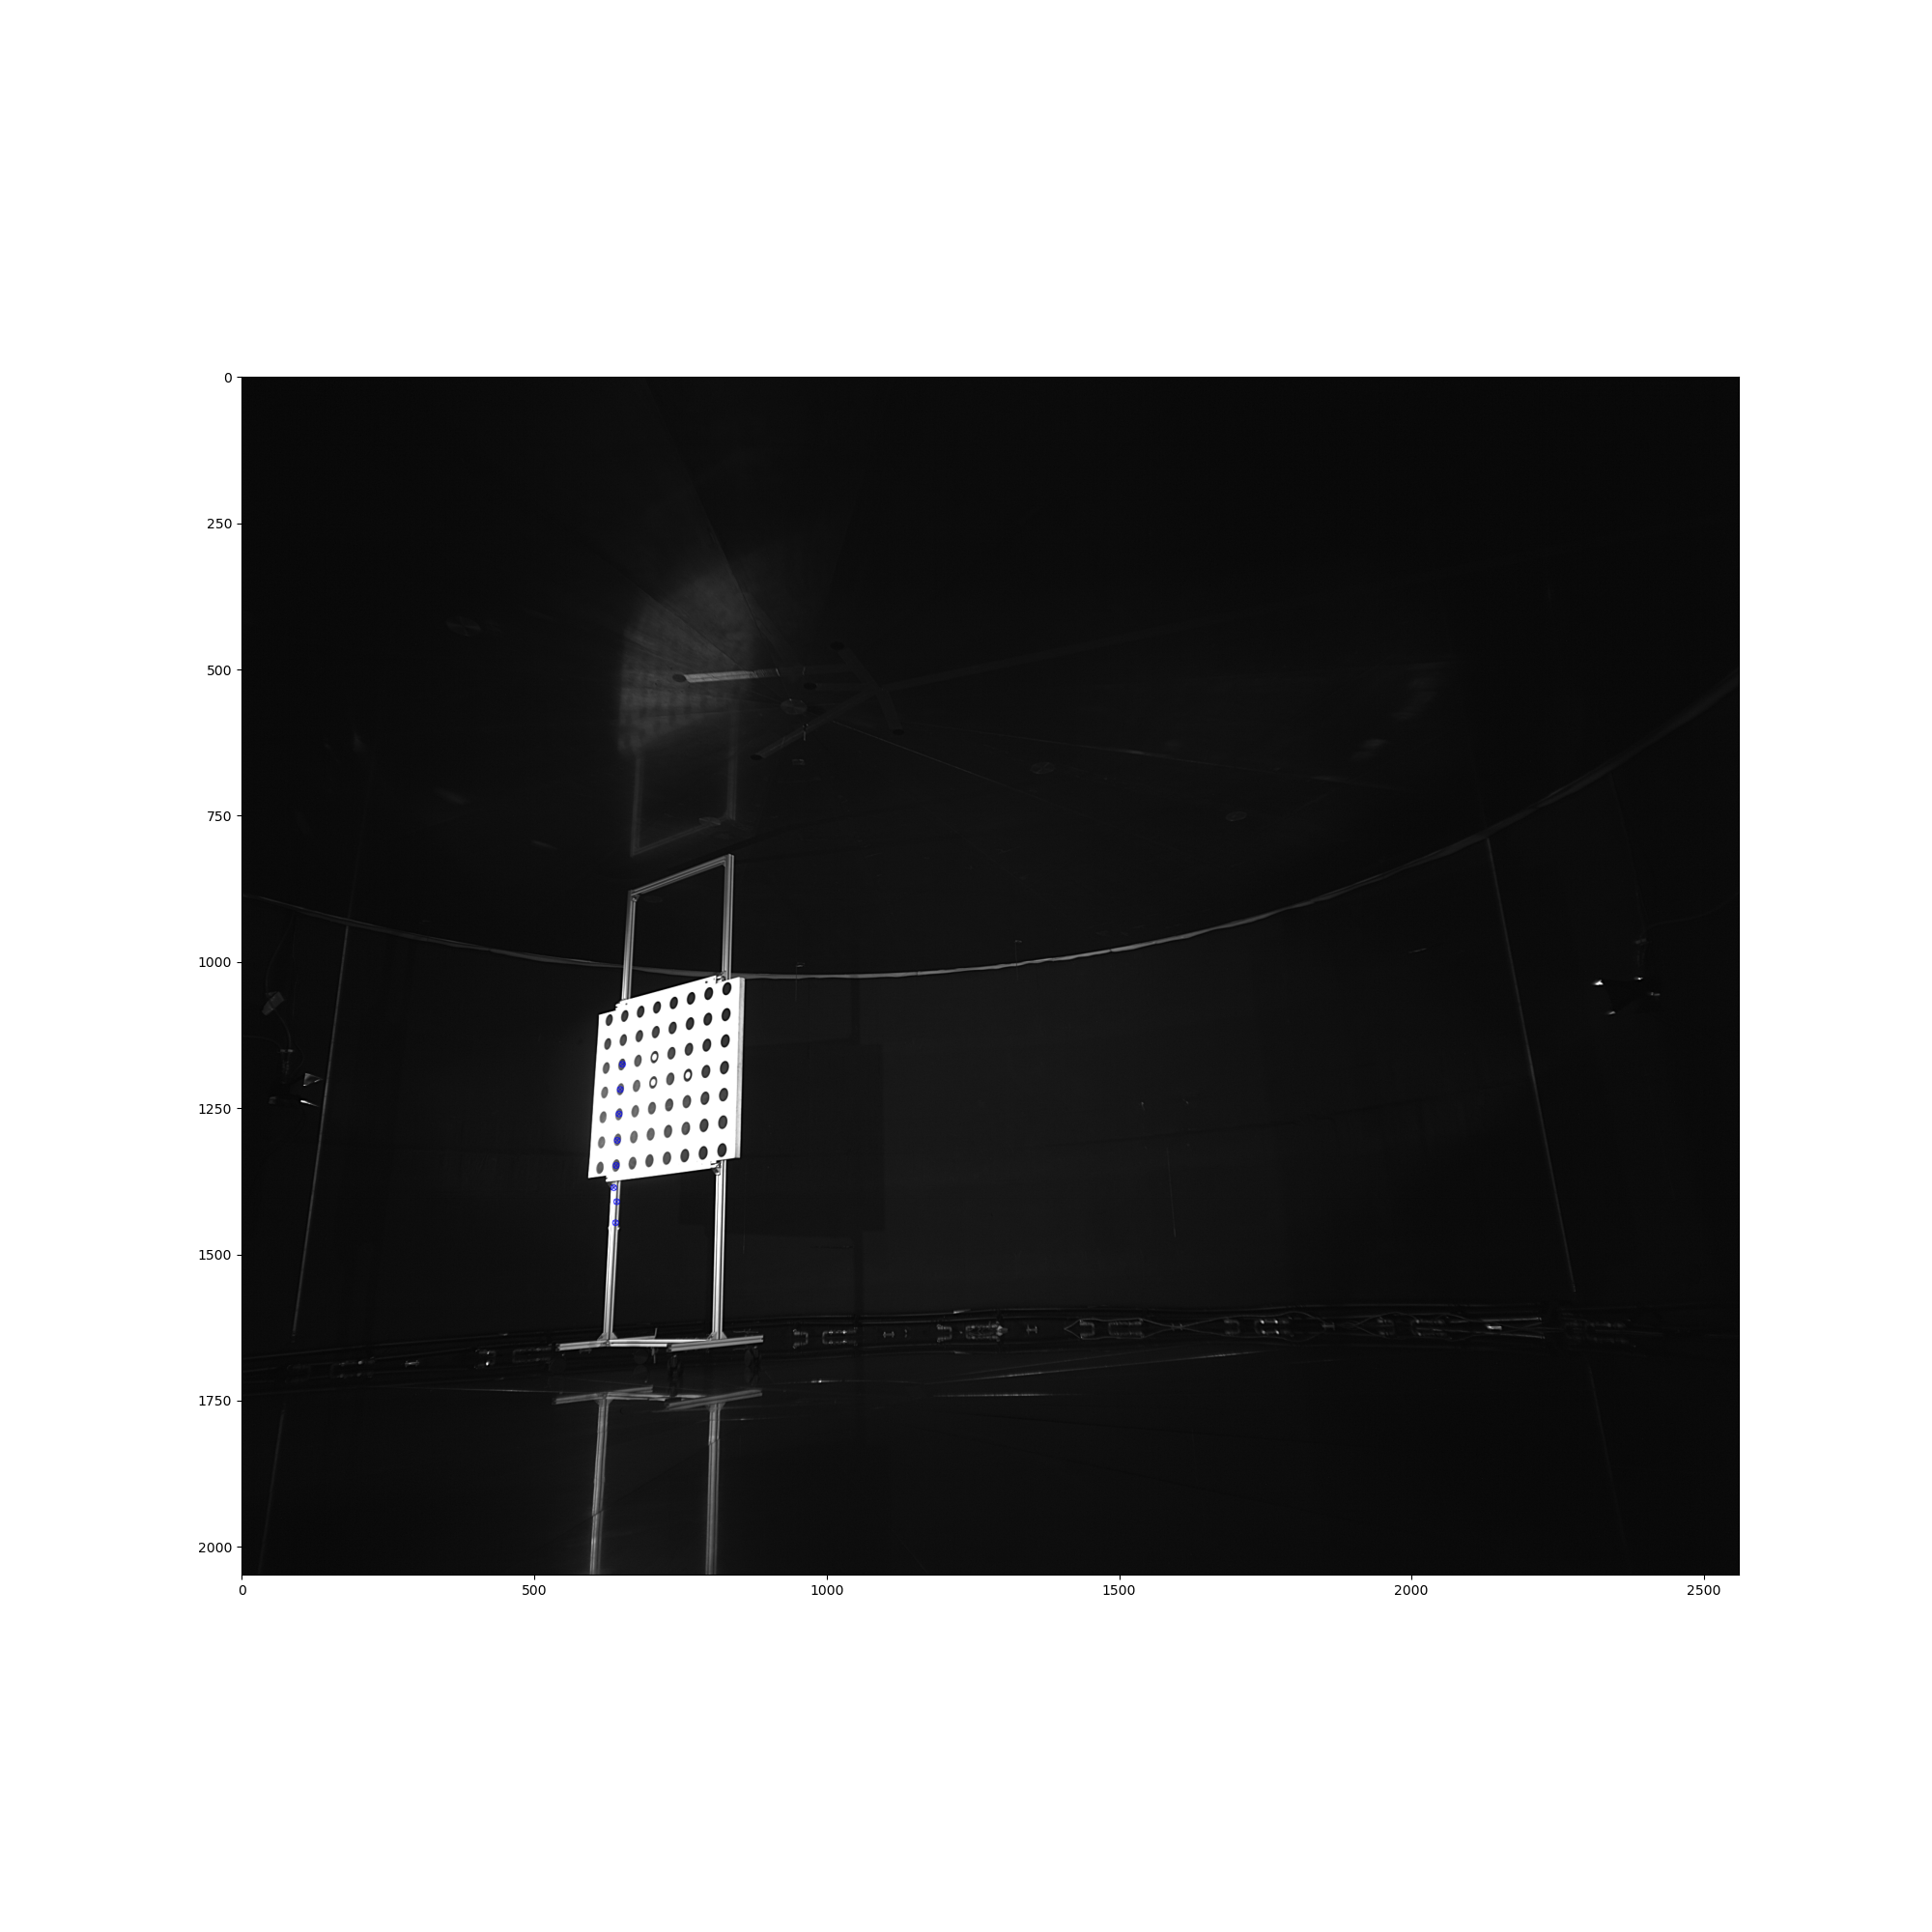

In [8]:
import numpy as np

# Setup SimpleBlobDetector parameters.
params = cv2.SimpleBlobDetector_Params()

# Change thresholds
params.filterByColor = True
params.minThreshold = 50
params.maxThreshold = 250


# Filter by Area.
params.filterByArea = True
params.minArea = 10

# Filter by Circularity
params.filterByCircularity = True
params.minCircularity = 0.1

# Filter by Convexity
params.filterByConvexity = True
params.minConvexity = 0.2

# Filter by Inertia
params.filterByInertia = True
params.minInertiaRatio = 0.01

# Create a detector with the parameters
# OLD: detector = cv2.SimpleBlobDetector(params)
detector = cv2.SimpleBlobDetector_create(params)


# Detect blobs.
keypoints = detector.detect(test_img)

# Draw detected blobs as red circles.
# cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS ensures
# the size of the circle corresponds to the size of blob

blank = np.zeros((1, 1))
im_with_keypoints = cv2.drawKeypoints(test_img, keypoints, blank, (255, 0, 0), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# Show blobs
# plt.figure()
plt.figure(figsize=(10,10))
 
# Displaying the image
# plt.subplot(121)
# plt.title('Original')
# plt.imshow(test_img, cmap='gray')
 
# plt.subplot(122)
# plt.title('Blobs')
plt.imshow(im_with_keypoints)
 
plt.show()
found, corners = cv2.findCirclesGrid(test_img,(8,7),
                                        flags=cv2.CALIB_CB_SYMMETRIC_GRID,
                                        blobDetector=detector
                                        )
vis = cv2.cvtColor(test_img, cv2.COLOR_GRAY2BGR)
cv2.drawChessboardCorners(vis, (8,7), corners, found)
plt.figure(figsize=(20,20))
plt.imshow(vis)
plt.show()

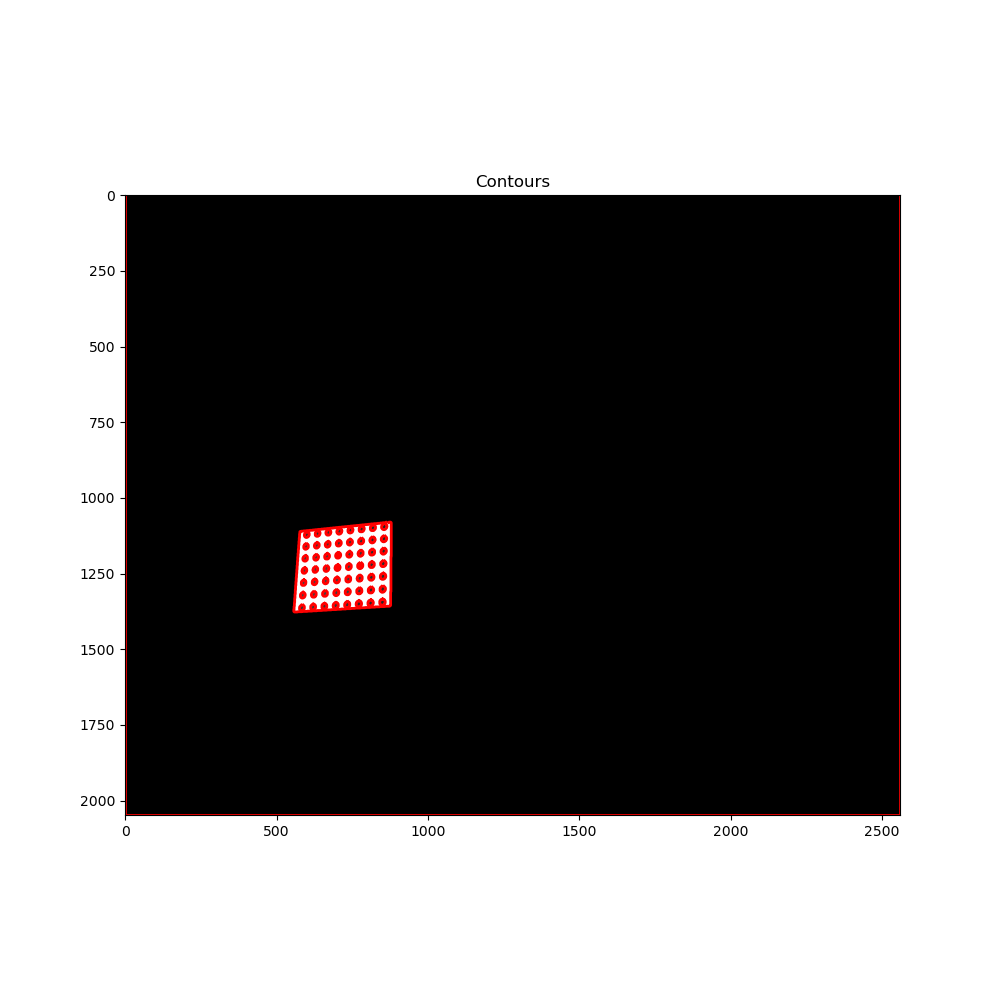

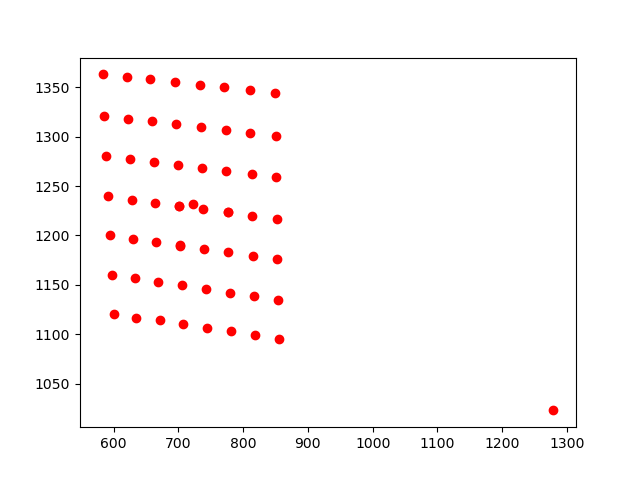

In [9]:
# import cv2
# import numpy as np

# def find_whiteboard(image_path):
    # Load the image
image = cv2.imread("/home/user/Downloads/2021_03_31_Data_set/Calibration/B00008_a.tiff")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Preprocessing: Gaussian Blur and Thresholding
blurred = cv2.GaussianBlur(gray, (5, 5), 0)
_, thresh = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

# Find contours of the dark dots
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Plot contours
plt.figure(figsize=(10, 10))
plt.imshow(image, cmap='gray')
for cnt in contours:
    plt.plot(cnt[:, 0, 0], cnt[:, 0, 1], 'r-', linewidth=2)
plt.title('Contours')
plt.show()

# Approximate the grid by sorting the dots spatially
dot_centers = []
for cnt in contours:
    M = cv2.moments(cnt)
    if M['m00'] != 0:
        cx = int(M['m10'] / M['m00'])  # x-coordinate of the center
        cy = int(M['m01'] / M['m00'])  # y-coordinate of the center
        dot_centers.append((cx, cy))

# Sort centers into a grid (7 rows x 8 columns)
dot_centers = np.array(dot_centers)
dot_centers = dot_centers[np.argsort(dot_centers[:, 1])]  # Sort by y-coordinate first (rows)

plt.figure()
plt.plot(dot_centers[:, 0], dot_centers[:, 1], 'ro')
plt.show()

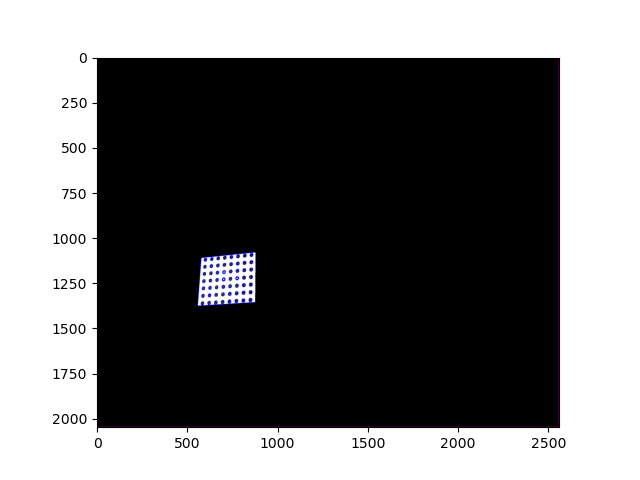

In [ ]:


grid = []
for i in range(7):  # 7 rows
    row = dot_centers[i * 8:(i + 1) * 8]  # 8 columns per row
    row = row[np.argsort(row[:, 0])]  # Sort each row by x-coordinate
    grid.append(row)
grid = np.array(grid)

# Detect L-shaped dots
L_dots = []
for cnt in contours:
    # Create a mask for the current contour
    mask = np.zeros_like(thresh)
    cv2.drawContours(mask, [cnt], -1, 255, -1)
    
    # Check for white regions inside the dark dot
    white_inside = cv2.bitwise_and(thresh, thresh, mask=mask)
    white_contours, _ = cv2.findContours(white_inside, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    
    if len(white_contours) > 0:  # If there's a white region inside the dark dot
        L_dots.append(cnt)

# Draw results
output = image.copy()
cv2.drawContours(output, contours, -1, (0, 255, 0), 2)  # Green for regular dots
cv2.drawContours(output, L_dots, -1, (0, 0, 255), 2)  # Red for L-shaped dots

# Draw grid or bounding box around the whiteboard
x, y, w, h = cv2.boundingRect(np.vstack(contours))
cv2.rectangle(output, (x, y), (x + w, y + h), (255, 0, 0), 2)  # Blue rectangle

# Display results
plt.figure()
plt.imshow(output)
plt.title('Output')
plt.show()
# cv2.waitKey(0)
# cv2.destroyAllWindows()

# Call the function with the image path
# find_whiteboard("/home/user/Downloads/2021_03_31_Data_set/Calibration/B00009_a.tiff")


In [4]:
symmetric_circles = Camera_Calibration_API(pattern_type="symmetric_circles",
                                          pattern_rows=7,
                                          pattern_columns=8,
                                          distance_in_world_units = 120,
                                          debug_dir='./debug_dir'
                                )

The Camera Calibration API is initialized and ready for calibration...


In [5]:
%%time
results = symmetric_circles.calibrate_camera(glob.glob("/home/user/Downloads/2021_03_31_Data_set/Calibration/*_a.tiff"))

There are 30 symmetric_circles images given for calibration
Running with 4 threads...
Processing /home/user/Downloads/2021_03_31_Data_set/Calibration/B00001_a.tiff
Processing /home/user/Downloads/2021_03_31_Data_set/Calibration/B00003_a.tiff
Processing /home/user/Downloads/2021_03_31_Data_set/Calibration/B00005_a.tiff
Processing /home/user/Downloads/2021_03_31_Data_set/Calibration/B00007_a.tiff
Calibration board NOT FOUND
Processing /home/user/Downloads/2021_03_31_Data_set/Calibration/B00008_a.tiff
Calibration board NOT FOUND
Processing /home/user/Downloads/2021_03_31_Data_set/Calibration/B00009_a.tiff
Calibration board NOT FOUND
Processing /home/user/Downloads/2021_03_31_Data_set/Calibration/B00002_a.tiff
Calibration board NOT FOUND
Processing /home/user/Downloads/2021_03_31_Data_set/Calibration/B00011_a.tiff
Calibration board NOT FOUND
Processing /home/user/Downloads/2021_03_31_Data_set/Calibration/B00006_a.tiff
Calibration board NOT FOUND
Processing /home/user/Downloads/2021_03_31_D

error: OpenCV(4.11.0) /io/opencv/modules/calib3d/src/calibration.cpp:1379: error: (-215:Assertion failed) nimages > 0 in function 'calibrateCameraRO'


In [6]:
symmetric_circles.calibration_df

,image_names,img_points,obj_points


In [7]:
symmetric_circles.visualize_calibration_boards(20,10)

AttributeError: 'Camera_Calibration_API' object has no attribute 'camera_matrix'